<a href="https://colab.research.google.com/github/mukti222/EDA_superstore_python/blob/main/10_study_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Gunakan dataset ini dan jawablah pertanyaan berikut dengan benar

# 1. Berapa nilai total penjualan selama tahun 2017?
# 2.Berapa kenaikan nilai penjualan dari tahun 2015 ke tahun 2016?
# 3. Siapakah konsumen dengan nilai penjualan tertinggi secara keseluruhan
# 4. Berapa kali konsumen bernama Claire Gute melakukan transaksi?
# 5 Produk apa yang mendatangkan keuntungan terbanyak di tahun 2016?
# 6 Produk apa yang mendatangkan kerugian terbesar di tahun 2016?
# 7 Produk apa yang paling best seller di tahun 2015? (dilihat berdasarkan unit yang terjual)
# 8 Buatlah line chart yang menunjukan nilai penjualan dari waktu ke waktu
# 9 Buatlah bar chart yang menunjukkan total keuntungan berdasarkan region
# 10 Buatlah bar chart yang menunjukkan total nilai penjualan berdasarkan region dan product category

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
df = pd.read_csv('/content/superstore.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         9994 non-null   int64  
 1   order_id       9994 non-null   object 
 2   order_date     9994 non-null   object 
 3   ship_date      9994 non-null   object 
 4   ship_mode      9994 non-null   object 
 5   customer_id    9994 non-null   object 
 6   customer_name  9994 non-null   object 
 7   segment        9994 non-null   object 
 8   country        9994 non-null   object 
 9   city           9994 non-null   object 
 10  state          9994 non-null   object 
 11  postal_code    9994 non-null   int64  
 12  region         9994 non-null   object 
 13  product_id     9994 non-null   object 
 14  category       9994 non-null   object 
 15  subcategory    9994 non-null   object 
 16  product_name   9994 non-null   object 
 17  sales          9994 non-null   float64
 18  quantity

In [ ]:
# ############################################### JAWABAN NO 1 ##############################################################

df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

# filter th 2017
data_2017 = df[df['order_date'].dt.year == 2017]

# Pivot table untuk nilai penjualan (sales) pada tahun 2017
pivot_2017 = data_2017.pivot_table(
    index=pd.Grouper(freq='y',key='order_date'),
    values='sales',
    aggfunc='sum')

# Tampilkan hasil pivot table
print(pivot_2017)


                  sales
order_date             
2017-12-31  733215.2552


In [ ]:
# ############################################ JAWABAN NO 2 #######################################################

total_2015 = df[df['order_date'].dt.year == 2015]
sales_2015 = total_2015.pivot_table(
    index=pd.Grouper(freq='y',key='order_date'),
    values='sales',
    aggfunc='sum')
# print(sales_2015)

total_2016  = df[df['order_date'].dt.year == 2016]
sales_2016 = total_2016.pivot_table(
    index=pd.Grouper(freq='y',key='order_date'),
    values='sales',
    aggfunc='sum')
# print(sales_2016)

kenaikan_penjualan = sales_2016.iloc[0, 0] - sales_2015.iloc[0, 0]
kenaikan_penjualan

138673.08899999998

In [ ]:
# ############################################ JAWABAN NO 3 #######################################################

# 3. Siapakah konsumen dengan nilai penjualan tertinggi secara keseluruhan
# mencari sum sales
# dari konsumen
# diurutkan dari tertinggi

customer_sales = df.pivot_table(
    index='customer_name',
    values='sales',
    aggfunc='sum')


customer_sales_sorted = customer_sales.sort_values(by='sales', ascending=False)

# Menampilkan hasil
print(customer_sales_sorted)

                     sales
customer_name             
Sean Miller      25043.050
Tamara Chand     19052.218
Raymond Buch     15117.339
Tom Ashbrook     14595.620
Adrian Barton    14473.571
...                    ...
Roy Skaria          22.328
Mitch Gastineau     16.739
Carl Jackson        16.520
Lela Donovan         5.304
Thais Sissman        4.833

[793 rows x 1 columns]


In [ ]:
# ############################################ JAWABAN NO 4 ###########################################################
# 4. Berapa kali konsumen bernama Claire Gute melakukan transaksi?

clairegute_orders = df[df['customer_name'] == 'Claire Gute'].pivot_table(
    index='customer_name',
    values='order_id',
    aggfunc='count')

# Menampilkan hasil
print(clairegute_orders)

               order_id
customer_name          
Claire Gute           5


In [22]:
# ############################################ JAWABAN NO 5 ###########################################################
# soal : Produk apa yang mendatangkan keuntungan terbanyak di tahun 2016?
# logika : mencari count profit dari product di year 2016
# flow : df filter ke 2016 saja >> sum profit by index=productname >> urutkan >> ambil top 1

df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

# filter th 2016
data_2016 = df[df['order_date'].dt.year == 2016]

# sum profit by index=productname
sum_product_sales_2016 = data_2016.pivot_table(
    index='product_name',
    values='profit',
    aggfunc='sum')

#urutkan
sum_product_sales_2016 = sum_product_sales_2016.sort_values(by='profit', ascending=False)

#ambil top 1
top_product_2016 = sum_product_sales_2016.head(1)

top_product_2016


,profit
product_name,
Canon imageCLASS 2200 Advanced Copier,9519.9728


In [23]:
# ############################################ JAWABAN NO 6 ###########################################################
# 6 Produk apa yang mendatangkan kerugian terbesar di tahun 2016?
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

# filter th 2016
data_2016 = df[df['order_date'].dt.year == 2016]

# sum profit by index=productname
sum_product_profit_2016 = data_2016.pivot_table(
    index='product_name',
    values='profit',
    aggfunc='sum')

#urutkan
sum_product_profit_2016 = sum_product_profit_2016.sort_values(by='profit', ascending=True)

#ambil top 1
top_product_2016 = sum_product_profit_2016.head(1)

top_product_2016

,profit
product_name,
Cubify CubeX 3D Printer Double Head Print,-6599.978


In [32]:
# ############################################ JAWABAN NO 7 ###########################################################
# 7 Produk apa yang paling best seller di tahun 2015? (dilihat berdasarkan unit yang terjual)
# logika : mencari jumlah quantity di produk, filter tahun 2015
# flow : filter >> count sales, index = product name >> urutkan

# filter th 2016
data_2015 = df[df['order_date'].dt.year == 2015]

# sum profit by index=productname
sum_product_sales_2015 = data_2015.pivot_table(
    index='product_name',
    values='quantity',
    aggfunc='sum')

sum_product_sales_2015 = sum_product_sales_2015.sort_values(by='quantity', ascending=False)

#ambil top 1
bestseller_product_2015 = sum_product_sales_2015.head(1)

bestseller_product_2015

,quantity
product_name,
Staple envelope,43


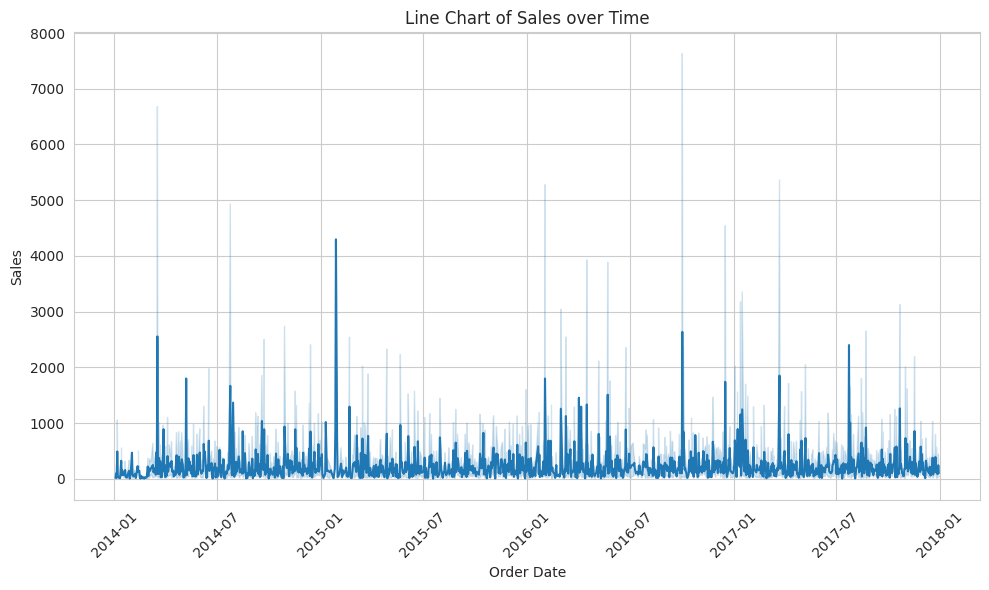

In [36]:
# ############################################ JAWABAN NO 8 ###########################################################
# 8 Buatlah line chart yang menunjukan nilai penjualan dari waktu ke waktu
# buat line chart dengan variabelnya adalah x=order_date dan y=sales

import seaborn as sns
import matplotlib.pyplot as plt

# Mengatur gaya seaborn
sns.set_style("whitegrid")

# Membuat line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='order_date', y='sales')
plt.title('Line Chart of Sales over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan grafik
plt.show()


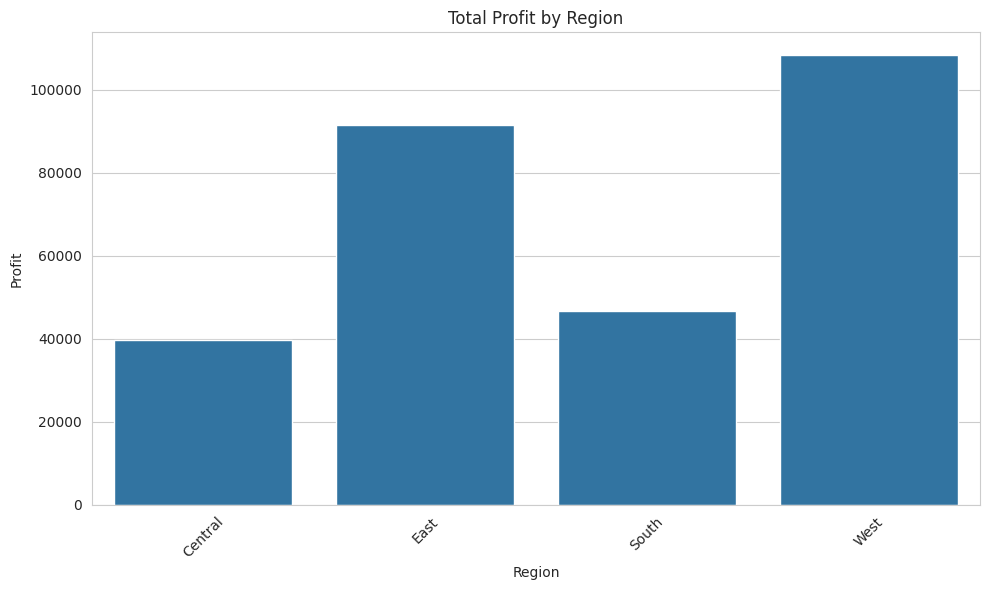

In [39]:
# ############################################ JAWABAN NO 9 ###########################################################
# 9 Buatlah bar chart yang menunjukkan total keuntungan berdasarkan region
# buat sum profit berdasarkan region
# lalu buat bar chart
# y = profit, x = region

import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung total profit berdasarkan region
profit_by_region = df.groupby('region')['profit'].sum().reset_index()
profit_by_region

# Membuat bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=profit_by_region, x='region', y='profit')
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan grafik
plt.show()


<Axes: xlabel='category', ylabel='sales'>

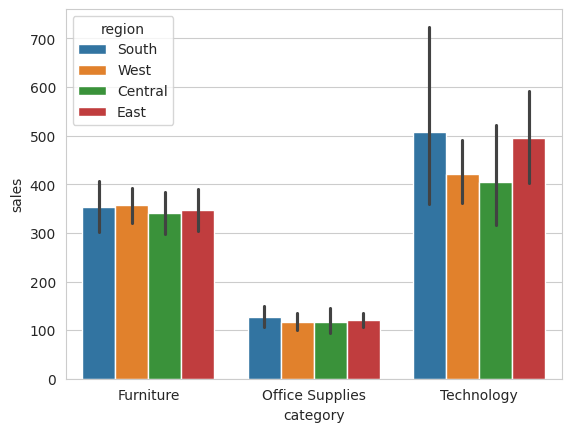

In [48]:
# ############################################ JAWABAN NO 10 ###########################################################
# 10 Buatlah bar chart yang menunjukkan total nilai penjualan berdasarkan region dan product category


sns.barplot(df, x='category', y='sales', hue='region')
